<a href="https://colab.research.google.com/github/oushnik23/Drug-Classification/blob/main/drug_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [20]:
dataset=pd.read_csv("drug200.csv")
dataset

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [3]:
rows,cols=dataset.shape

In [ ]:
print(f"this dataset is having {rows} rows and {cols} columns")

this dataset is having 200 rows and 6 columns


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [5]:
dataset.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [6]:
dataset.isnull().any()

Age            False
Sex            False
BP             False
Cholesterol    False
Na_to_K        False
Drug           False
dtype: bool

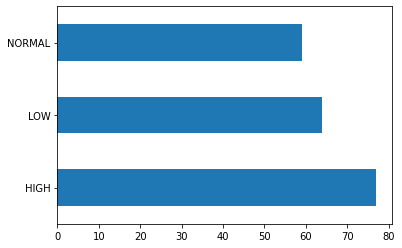

In [7]:
dataset['BP'].value_counts().plot(kind='barh')

In [8]:
cat=(dataset.dtypes=='object')
cat_col=list(cat[cat].index)
print(cat_col)

['Sex', 'BP', 'Cholesterol', 'Drug']


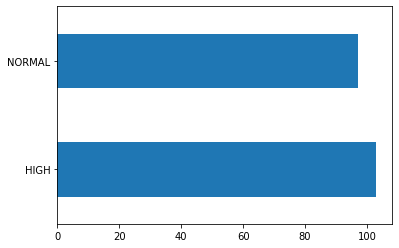

In [9]:
dataset['Cholesterol'].value_counts().plot(kind='barh')

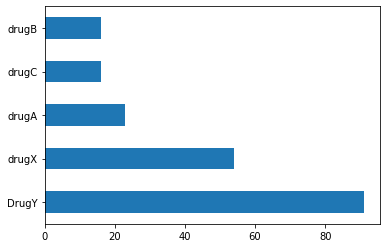

In [10]:
dataset['Drug'].value_counts().plot(kind='barh')

In [11]:
num=(dataset.dtypes!='object')
num_col=list(num[num].index)
print(num_col)

['Age', 'Na_to_K']


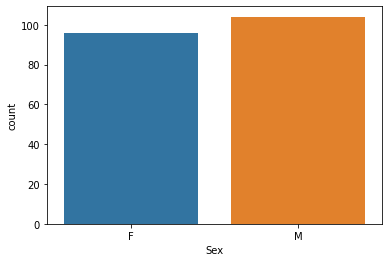

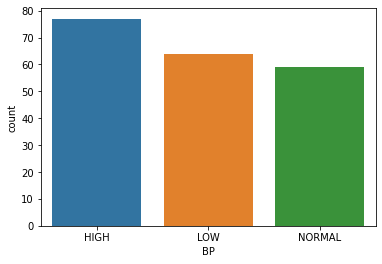

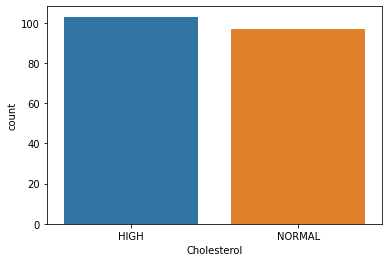

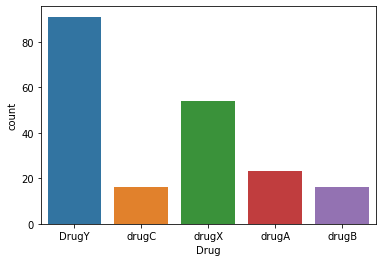

In [12]:
for i in cat_col:
  sns.countplot(dataset[i])
  plt.show()

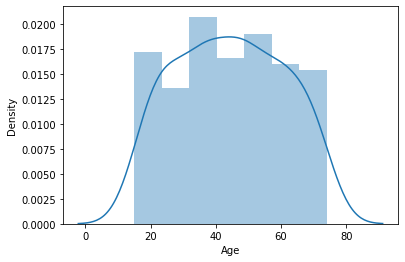

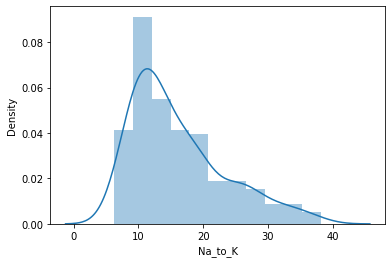

In [13]:
for i in num_col:
  sns.distplot(dataset[i])
  plt.show()

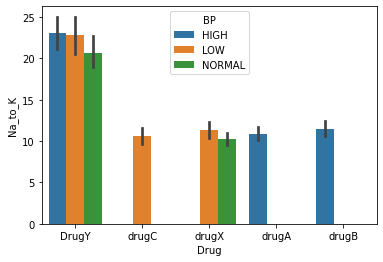

In [14]:
sns.barplot(x='Drug',y='Na_to_K',data=dataset,hue='BP')

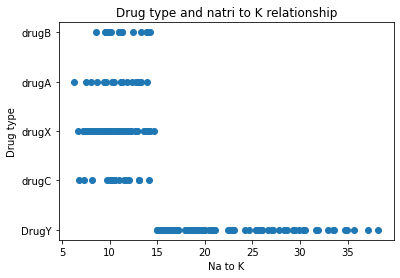

In [15]:
plt.scatter(data=dataset,y='Drug',x='Na_to_K')
plt.xlabel('Na to K')
plt.ylabel("Drug type")
plt.title("Drug type and natri to K relationship")
plt.show()

In [22]:
dataset['Drug'].value_counts()

DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

In [23]:
dataset['Drug']=dataset['Drug'].replace(to_replace='drugA',value=0)
dataset['Drug']=dataset['Drug'].replace(to_replace='DrugY',value=1)
dataset['Drug']=dataset['Drug'].replace(to_replace='drugX',value=2)
dataset['Drug']=dataset['Drug'].replace(to_replace='drugC',value=3)
dataset['Drug']=dataset['Drug'].replace(to_replace='drugB',value=4)

In [24]:
x=dataset.drop(['Drug'],axis=1)
x

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,F,HIGH,HIGH,25.355
1,47,M,LOW,HIGH,13.093
2,47,M,LOW,HIGH,10.114
3,28,F,NORMAL,HIGH,7.798
4,61,F,LOW,HIGH,18.043
...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567
196,16,M,LOW,HIGH,12.006
197,52,M,NORMAL,HIGH,9.894
198,23,M,NORMAL,NORMAL,14.020


In [25]:
y=dataset[['Drug']]
y

,Drug
0,1
1,3
2,3
3,2
4,1
...,...
195,3
196,3
197,2
198,2


In [26]:
x=pd.get_dummies(x)

In [27]:
x

,Age,Na_to_K,Sex_F,Sex_M,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL
0,23,25.355,1,0,1,0,0,1,0
1,47,13.093,0,1,0,1,0,1,0
2,47,10.114,0,1,0,1,0,1,0
3,28,7.798,1,0,0,0,1,1,0
4,61,18.043,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...
195,56,11.567,1,0,0,1,0,1,0
196,16,12.006,0,1,0,1,0,1,0
197,52,9.894,0,1,0,0,1,1,0
198,23,14.020,0,1,0,0,1,0,1


In [28]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.2)

In [29]:
from sklearn.linear_model import LogisticRegression
lr_model=LogisticRegression()
lr_model.fit(xtrain,ytrain)

LogisticRegression()

In [30]:
y_pred=lr_model.predict(xtest)

In [31]:
print(np.concatenate((y_pred.reshape(len(y_pred),1),ytest.values.reshape(len(ytest),1)),1))

[[2 2]
 [2 2]
 [1 1]
 [1 1]
 [3 3]
 [2 2]
 [2 2]
 [1 1]
 [3 3]
 [1 1]
 [2 2]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [4 4]
 [0 0]
 [1 1]
 [1 1]
 [4 4]
 [4 4]
 [2 2]
 [1 1]
 [2 2]
 [1 1]
 [2 2]
 [3 3]
 [2 2]
 [1 1]
 [0 0]
 [2 2]
 [0 0]
 [1 1]
 [0 0]
 [2 2]
 [4 1]
 [2 2]
 [2 1]]


In [32]:
from sklearn.metrics import accuracy_score, classification_report,plot_confusion_matrix

In [33]:
print("Score for LogisticRegression is {:.2f}%".format(accuracy_score(y_pred,ytest)*100))

Score for LogisticRegression is 95.00%


In [34]:
classification_report(ytest,y_pred)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00         6\n           1       1.00      0.88      0.93        16\n           2       0.92      1.00      0.96        12\n           3       1.00      1.00      1.00         3\n           4       0.75      1.00      0.86         3\n\n    accuracy                           0.95        40\n   macro avg       0.93      0.97      0.95        40\nweighted avg       0.96      0.95      0.95        40\n'

In [35]:
from sklearn.model_selection import cross_val_score

In [36]:
score=cross_val_score(X=xtrain,y=ytrain,estimator=lr_model,cv=10)

In [37]:
print("Score is {:.2f}%".format(score.mean()*100))

Score is 93.12%


In [38]:
print("Standard deviation {:.2f}%".format(score.std()*100))

Standard deviation 7.63%


<Figure size 864x648 with 0 Axes>

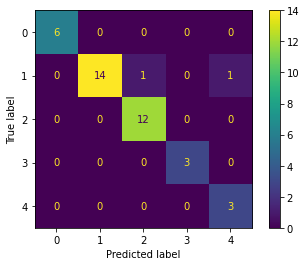

In [39]:
plt.figure(figsize=(12,9))
plot_confusion_matrix(lr_model,xtest,ytest)

In [40]:
from sklearn.ensemble import RandomForestClassifier
rm_model=RandomForestClassifier(n_estimators=10)
rm_model.fit(xtrain,ytrain)

RandomForestClassifier(n_estimators=10)

In [41]:
y_pred2=rm_model.predict(xtest)

In [42]:
accuracy_score(y_pred2,ytest)*100

100.0

In [43]:
score=cross_val_score(rm_model,xtrain,ytrain,cv=10)

In [44]:
print("Cross validation score {:.2f}%".format(score.mean()*100))

Cross validation score 98.12%


In [45]:
print("Standard deviation {:.2f}".format(score.std()*100))

Standard deviation 2.86


In [46]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(xtrain,ytrain)

KNeighborsClassifier()

In [47]:
y_pred3=knn.predict(xtest)

In [48]:
print("KNN Score is {:.2f}%".format(accuracy_score(y_pred3,ytest)*100))

KNN Score is 50.00%


In [49]:
score=cross_val_score(knn,X=xtrain,y=ytrain,cv=10)

In [50]:
print("Cross validation score is {:.2f}%".format(score.mean()*100))

Cross validation score is 68.75%


In [51]:
print("Standard deviation {:.2f}%".format(score.std()*100))

Standard deviation 7.40%


Text(0, 0.5, 'Actual')

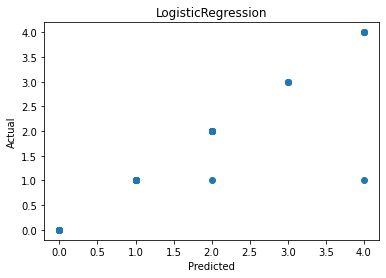

In [53]:
plt.scatter(x=y_pred,y=ytest)
plt.title("LogisticRegression")
plt.xlabel("Predicted")
plt.ylabel("Actual")

Text(0, 0.5, 'Actual')

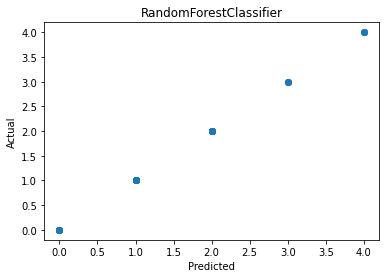

In [54]:
plt.scatter(x=y_pred2,y=ytest)
plt.title("RandomForestClassifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")

Text(0, 0.5, 'Actual')

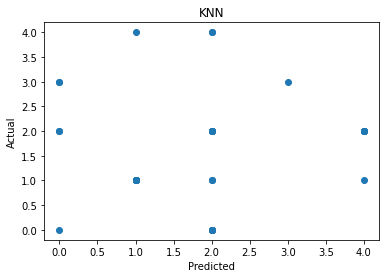

In [55]:
plt.scatter(x=y_pred3,y=ytest)
plt.title("KNN")
plt.xlabel("Predicted")
plt.ylabel("Actual")